In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import concatenate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# standard data 
## 1초에 200개의 데이터

In [2]:
path = 'sisfall_sample2.csv'
data = pd.read_csv(path)
data = data.drop('Unnamed: 0', axis = 1)
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA01
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA01
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA01
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA01
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA01
...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,D17,SE15
2009996,70,-130,-166,216,77,367,309,-489,-725,D17,SE15
2009997,71,-140,-166,246,75,363,305,-517,-727,D17,SE15
2009998,75,-146,-165,276,70,362,299,-536,-732,D17,SE15


In [3]:
Female = ['SA01', 'SA03','SA07','SA08','SA12','SA13','SA14','SA15','SA16','SA20','SA22', 'SA23'
         , 'SE02','SE03','SE04','SE08','SE10','SE11','SE15']
male = ['SA02','SA04','SA05','SA06','SA09','SA10','SA11','SA17','SA18','SA19','SA21',
        'SE01','SE05','SE06','SE07','SE09','SE12','SE13','SE14']

Fall = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10',
         'F11','F12','F13','F14','F15']

Non_Fall = SA_ADL = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
       'D11','D12','D13','D14','D15','D16','D17','D18','D19']

subject_id = ['SA01','SA02','SA03','SA04','SA05','SA06','SA07','SA08','SA09','SA10',
              'SA11','SA12','SA13','SA14','SA15','SA16','SA17','SA18','SA19','SA20','SA21','SA22','SA23',
             'SE01','SE02','SE03','SE04','SE05','SE06','SE07','SE08','SE09','SE10',
              'SE11','SE12','SE13','SE14','SE15']

activities = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
              'D11','D12','D13','D14','D15','D16','D17','D18','D19'
              'F01','F02','F03','F04','F05','F06','F07','F08','F09','F10',
              'F11','F12','F13','F14','F15',]

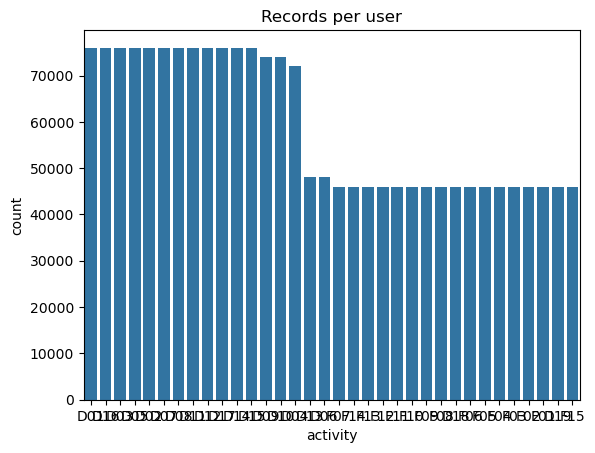

In [4]:
sns.countplot(x = "activity", data = data, palette = [sns.color_palette()[0]],
              order = data.activity.value_counts().index)
plt.title("Records per user");

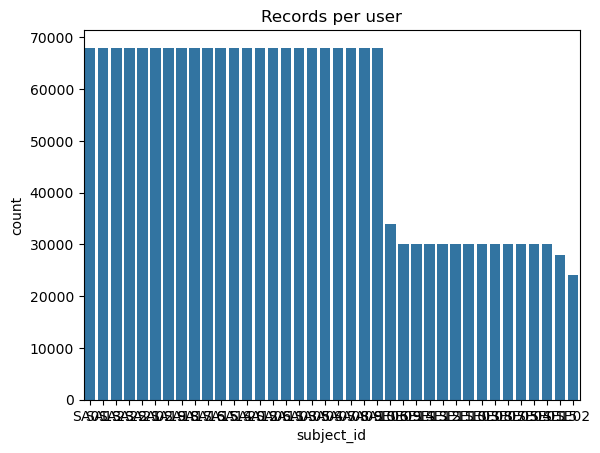

In [5]:
sns.countplot(x = "subject_id", data = data, palette = [sns.color_palette()[0]],
              order = data.subject_id.value_counts().index)
plt.title("Records per user");

In [6]:
data['sex'] = np.where(data['subject_id'].isin(Female), 'F', 'M')

In [7]:
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA01,F
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA01,F
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA01,F
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA01,F
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,D17,SE15,F
2009996,70,-130,-166,216,77,367,309,-489,-725,D17,SE15,F
2009997,71,-140,-166,246,75,363,305,-517,-727,D17,SE15,F
2009998,75,-146,-165,276,70,362,299,-536,-732,D17,SE15,F


In [8]:
data['activity'].isin(Fall).value_counts()

False    1320000
True      690000
Name: activity, dtype: int64

In [9]:
 data.sex.value_counts()

F    1018000
M     992000
Name: sex, dtype: int64

# balanced_data

In [10]:
path = 'sisfall_balanced.csv'
balanced_data = pd.read_csv(path)
balanced_data = balanced_data.drop('Unnamed: 0', axis = 1)
balanced_data['sex'] = np.where(balanced_data['subject_id'].isin(Female), 'F', 'M')
balanced_data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,-9,-257,-25,84,247,27,-120,-987,63,F01,SA01,F
1,-3,-263,-23,99,258,35,-110,-1016,68,F01,SA01,F
2,-1,-270,-22,114,272,45,-94,-1037,69,F01,SA01,F
3,1,-277,-24,127,286,57,-81,-1062,69,F01,SA01,F
4,2,-281,-25,134,303,70,-71,-1079,63,F01,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2070945,74,-128,-162,192,73,377,307,-462,-726,D17,SE15,F
2070946,70,-130,-166,216,77,367,309,-489,-725,D17,SE15,F
2070947,71,-140,-166,246,75,363,305,-517,-727,D17,SE15,F
2070948,75,-146,-165,276,70,362,299,-536,-732,D17,SE15,F


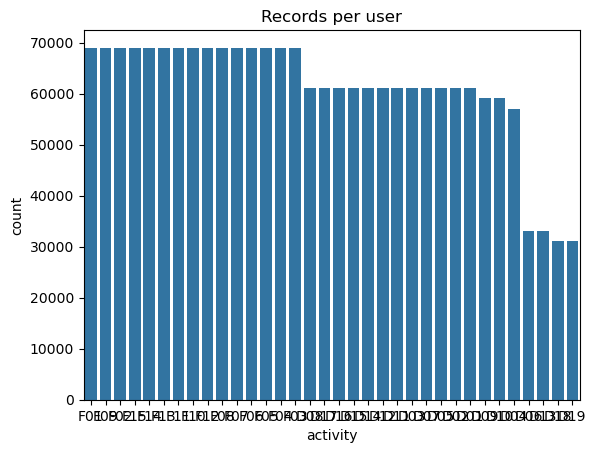

In [11]:
sns.countplot(x = "activity", data = balanced_data, palette = [sns.color_palette()[0]],
              order = balanced_data.activity.value_counts().index)
plt.title("Records per user");

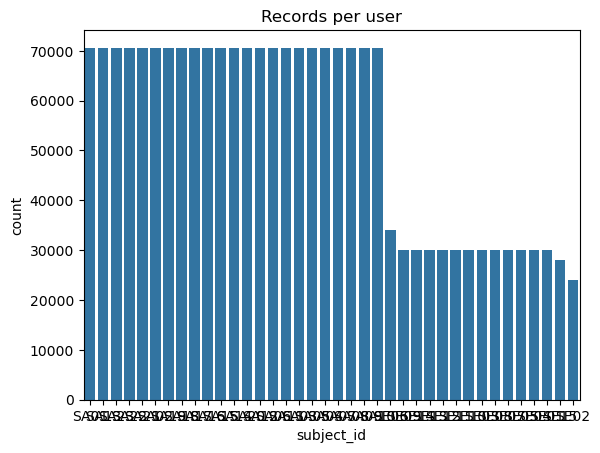

In [12]:
sns.countplot(x = "subject_id", data = balanced_data, palette = [sns.color_palette()[0]],
              order = balanced_data.subject_id.value_counts().index)
plt.title("Records per user");

In [13]:
balanced_data['activity'].isin(Fall).value_counts()

False    1035950
True     1035000
Name: activity, dtype: int64

In [14]:
 balanced_data.sex.value_counts()

F    1049800
M    1021150
Name: sex, dtype: int64

# 1D_Conv

In [15]:
columns = ['ADX_x_acc', 'ADX_y_acc', 'ADX_z_acc' ,
           'ITG_x_rot', 'ITG_y_rot','ITG_z_rot',
           'MMA_x_acc','MMA_y_acc','MMA_z_acc']

In [16]:
for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        data[column] = data[column] / data[column].max()
data.head()

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,0.004152,-0.043744,-0.024199,-0.000549,-0.032084,-0.029620,0.009278,-0.085093,-0.034062,D01,SA01,F
1,0.003664,-0.042522,-0.022000,-0.001617,-0.036158,-0.025749,0.005860,-0.082408,-0.031010,D01,SA01,F
2,0.000244,-0.043011,-0.019800,-0.002564,-0.039022,-0.022804,-0.000244,-0.081553,-0.026981,D01,SA01,F
3,-0.002443,-0.043988,-0.018822,-0.003174,-0.041187,-0.019101,-0.004151,-0.085093,-0.021365,D01,SA01,F
4,-0.005129,-0.046676,-0.015400,-0.003906,-0.042969,-0.016072,-0.009034,-0.090465,-0.016237,D01,SA01,F


In [17]:
le = LabelEncoder()
data['activity'] = le.fit_transform(data['activity'])
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,0.004152,-0.043744,-0.024199,-0.000549,-0.032084,-0.029620,0.009278,-0.085093,-0.034062,0,SA01,F
1,0.003664,-0.042522,-0.022000,-0.001617,-0.036158,-0.025749,0.005860,-0.082408,-0.031010,0,SA01,F
2,0.000244,-0.043011,-0.019800,-0.002564,-0.039022,-0.022804,-0.000244,-0.081553,-0.026981,0,SA01,F
3,-0.002443,-0.043988,-0.018822,-0.003174,-0.041187,-0.019101,-0.004151,-0.085093,-0.021365,0,SA01,F
4,-0.005129,-0.046676,-0.015400,-0.003906,-0.042969,-0.016072,-0.009034,-0.090465,-0.016237,0,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2009995,0.018075,-0.031281,-0.039599,0.005860,0.004647,0.031723,0.037480,-0.056403,-0.088634,16,SE15,F
2009996,0.017098,-0.031769,-0.040577,0.006592,0.004902,0.030882,0.037724,-0.059700,-0.088512,16,SE15,F
2009997,0.017342,-0.034213,-0.040577,0.007508,0.004774,0.030545,0.037236,-0.063118,-0.088756,16,SE15,F
2009998,0.018319,-0.035679,-0.040332,0.008423,0.004456,0.030461,0.036503,-0.065438,-0.089366,16,SE15,F


In [18]:
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 100
LABEL = 'activity'

In [19]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels

X_data, y_data = create_segments_and_labels(data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
#X_test, y_test = create_segments_and_labels(test_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

C:\Users\procns\AppData\Local\Temp\ipykernel_8336\1942712795.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (20098, 200, 9)
labels shape : (20098,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, stratify = y_train)

In [22]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")
X_val = X_test.astype("float32")
y_val = y_test.astype("float32")


In [23]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (12862, 200, 9)
y train : (12862,)
X test : (4020, 200, 9)
y test : (4020,)
X val : (4020, 200, 9)
y val : (4020,)


In [24]:
y_train =  y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)
y_val = enc.transform(y_val)

print(X_train.shape, y_train.shape)

(12862, 200, 9) (12862, 34)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
#Epoch 500

verbose,epochs,batch_size=1,30,32 
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [26]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,
                    validation_data= (X_val,y_val), verbose=verbose)
model.summary()

Epoch 1/30
402/402 [==============================] - 10s 24ms/step - loss: 2.6659 - accuracy: 0.2135 - val_loss: 2.4000 - val_accuracy: 0.2729
Epoch 2/30
402/402 [==============================] - 9s 23ms/step - loss: 2.2491 - accuracy: 0.2949 - val_loss: 2.2525 - val_accuracy: 0.3124
Epoch 3/30
402/402 [==============================] - 9s 24ms/step - loss: 2.1145 - accuracy: 0.3301 - val_loss: 2.1856 - val_accuracy: 0.3276
Epoch 4/30
402/402 [==============================] - 10s 24ms/step - loss: 2.0125 - accuracy: 0.3570 - val_loss: 2.1544 - val_accuracy: 0.3229
Epoch 5/30
402/402 [==============================] - 10s 25ms/step - loss: 1.9425 - accuracy: 0.3761 - val_loss: 2.1104 - val_accuracy: 0.3428
Epoch 6/30
402/402 [==============================] - 10s 25ms/step - loss: 1.8636 - accuracy: 0.3998 - val_loss: 2.1140 - val_accuracy: 0.3368
Epoch 7/30
402/402 [==============================] - 10s 25ms/step - loss: 1.8100 - accuracy: 0.4159 - val_loss: 2.0455 - val_accuracy: 0

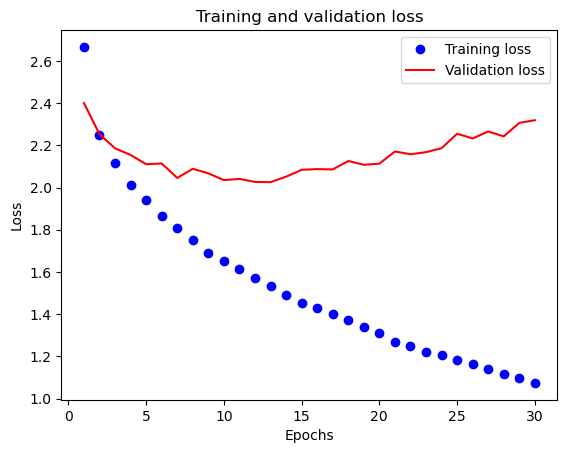

In [30]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

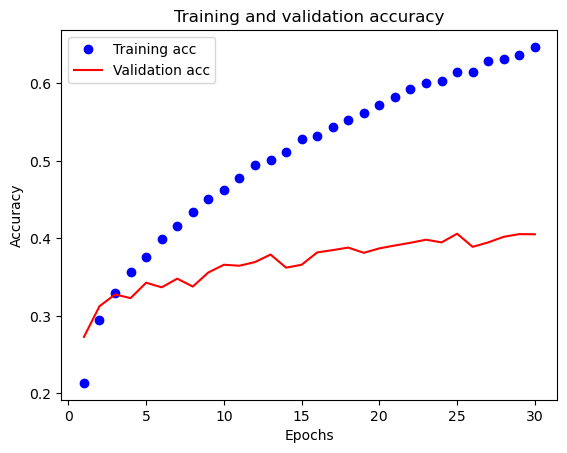

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

126/126 [==============================] - 1s 6ms/step - loss: 2.3189 - accuracy: 0.4052
Accuracy >40.522388
Base Loss >2.32


# balanced_data 1dcnn

In [32]:
for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        balanced_data[column] = balanced_data[column] / balanced_data[column].max()
balanced_data.head()

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,-0.002198,-0.062805,-0.006111,0.002564,0.015723,0.002272,-0.014650,-0.120498,0.007691,F01,SA01,F
1,-0.000733,-0.064272,-0.005622,0.003021,0.016424,0.002945,-0.013429,-0.124039,0.008302,F01,SA01,F
2,-0.000244,-0.065982,-0.005378,0.003479,0.017315,0.003787,-0.011476,-0.126602,0.008424,F01,SA01,F
3,0.000244,-0.067693,-0.005867,0.003876,0.018206,0.004796,-0.009889,-0.129654,0.008424,F01,SA01,F
4,0.000489,-0.068671,-0.006111,0.004089,0.019288,0.005890,-0.008668,-0.131730,0.007691,F01,SA01,F


In [33]:
le = LabelEncoder()
balanced_data['activity'] = le.fit_transform(balanced_data['activity'])
balanced_data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,-0.002198,-0.062805,-0.006111,0.002564,0.015723,0.002272,-0.014650,-0.120498,0.007691,19,SA01,F
1,-0.000733,-0.064272,-0.005622,0.003021,0.016424,0.002945,-0.013429,-0.124039,0.008302,19,SA01,F
2,-0.000244,-0.065982,-0.005378,0.003479,0.017315,0.003787,-0.011476,-0.126602,0.008424,19,SA01,F
3,0.000244,-0.067693,-0.005867,0.003876,0.018206,0.004796,-0.009889,-0.129654,0.008424,19,SA01,F
4,0.000489,-0.068671,-0.006111,0.004089,0.019288,0.005890,-0.008668,-0.131730,0.007691,19,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2070945,0.018075,-0.031281,-0.039599,0.005860,0.004647,0.031723,0.037480,-0.056403,-0.088634,16,SE15,F
2070946,0.017098,-0.031769,-0.040577,0.006592,0.004902,0.030882,0.037724,-0.059700,-0.088512,16,SE15,F
2070947,0.017342,-0.034213,-0.040577,0.007508,0.004774,0.030545,0.037236,-0.063118,-0.088756,16,SE15,F
2070948,0.018319,-0.035679,-0.040332,0.008423,0.004456,0.030461,0.036503,-0.065438,-0.089366,16,SE15,F


In [34]:
TIME_PERIODS = 200
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 100
LABEL = 'activity'

In [35]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels

X_data, y_data = create_segments_and_labels(balanced_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
#X_test, y_test = create_segments_and_labels(test_data, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

C:\Users\procns\AppData\Local\Temp\ipykernel_8336\2441663299.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (20708, 200, 9)
labels shape : (20708,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, stratify = y_train)

In [38]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")
X_val = X_test.astype("float32")
y_val = y_test.astype("float32")


In [39]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (13252, 200, 9)
y train : (13252,)
X test : (4142, 200, 9)
y test : (4142,)
X val : (4142, 200, 9)
y val : (4142,)


In [40]:
y_train =  y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)
y_val = enc.transform(y_val)

print(X_train.shape, y_train.shape)

(13252, 200, 9) (13252, 34)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
#Epoch 500

verbose,epochs,batch_size=1,30,32 
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [42]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,
                    validation_data= (X_val,y_val), verbose=verbose)
model.summary()

Epoch 1/30
415/415 [==============================] - 11s 26ms/step - loss: 2.6921 - accuracy: 0.1883 - val_loss: 2.4822 - val_accuracy: 0.2306
Epoch 2/30
415/415 [==============================] - 10s 25ms/step - loss: 2.3021 - accuracy: 0.2638 - val_loss: 2.3583 - val_accuracy: 0.2566
Epoch 3/30
415/415 [==============================] - 11s 26ms/step - loss: 2.1560 - accuracy: 0.2990 - val_loss: 2.2135 - val_accuracy: 0.2871
Epoch 4/30
415/415 [==============================] - 11s 26ms/step - loss: 2.0586 - accuracy: 0.3265 - val_loss: 2.1689 - val_accuracy: 0.2895
Epoch 5/30
415/415 [==============================] - 11s 26ms/step - loss: 1.9735 - accuracy: 0.3545 - val_loss: 2.1352 - val_accuracy: 0.3155
Epoch 6/30
415/415 [==============================] - 11s 27ms/step - loss: 1.8991 - accuracy: 0.3733 - val_loss: 2.1130 - val_accuracy: 0.3175
Epoch 7/30
415/415 [==============================] - 11s 26ms/step - loss: 1.8198 - accuracy: 0.3987 - val_loss: 2.0688 - val_accuracy:

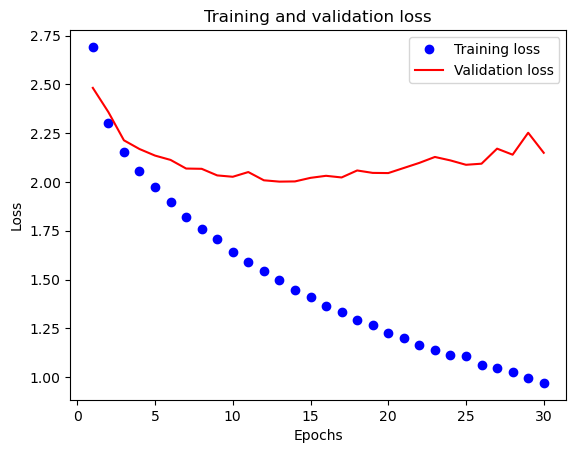

In [45]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

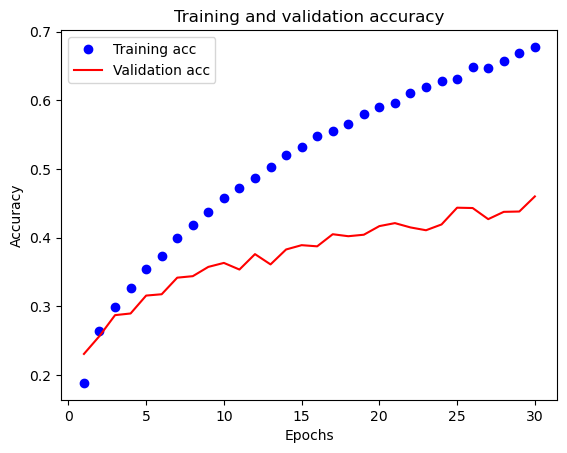

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

130/130 [==============================] - 1s 6ms/step - loss: 2.1495 - accuracy: 0.4599
Accuracy >45.992273
Base Loss >2.15
